**Иерархическая кластеризация (Hierarchical Clustering)**

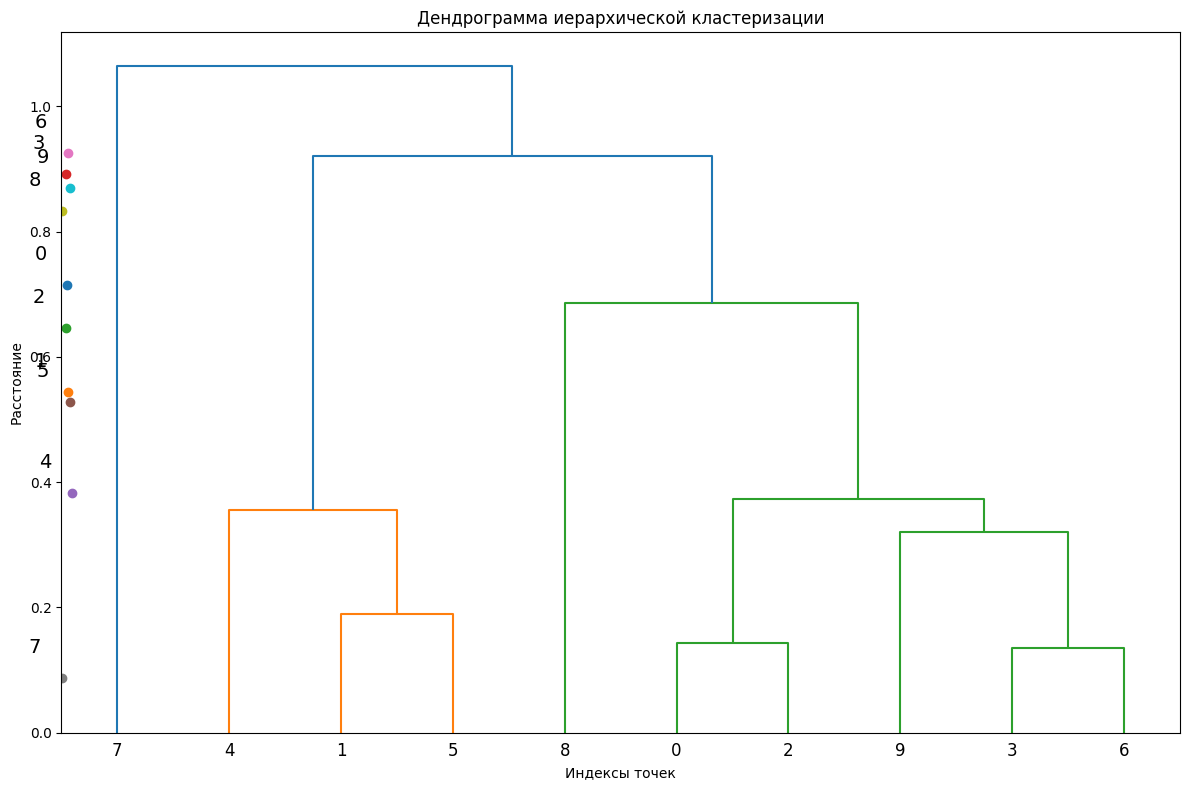

In [ ]:
import numpy as np
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

# Генерация случайных точек данных
np.random.seed(0)
data = np.random.rand(10, 2)

# Создание матрицы расстояний
distance_matrix = linkage(data, method='ward')

# Построение дендрограммы
plt.figure(figsize=(12, 8))  # Увеличил размер фигуры для удобства просмотра

# Отображение точек с номерами
for i in range(len(data)):
    plt.scatter(data[i][0], data[i][1])
    plt.annotate(f'{i}', xy=data[i], xytext=(-15, 15), textcoords='offset points', ha='right', va='bottom', fontsize=14)

# Дендрограмма
dendrogram(distance_matrix)

plt.title('Дендрограмма иерархической кластеризации')
plt.xlabel('Индексы точек')
plt.ylabel('Расстояние')
plt.tight_layout()  # Улучшение компоновки графика
plt.show()


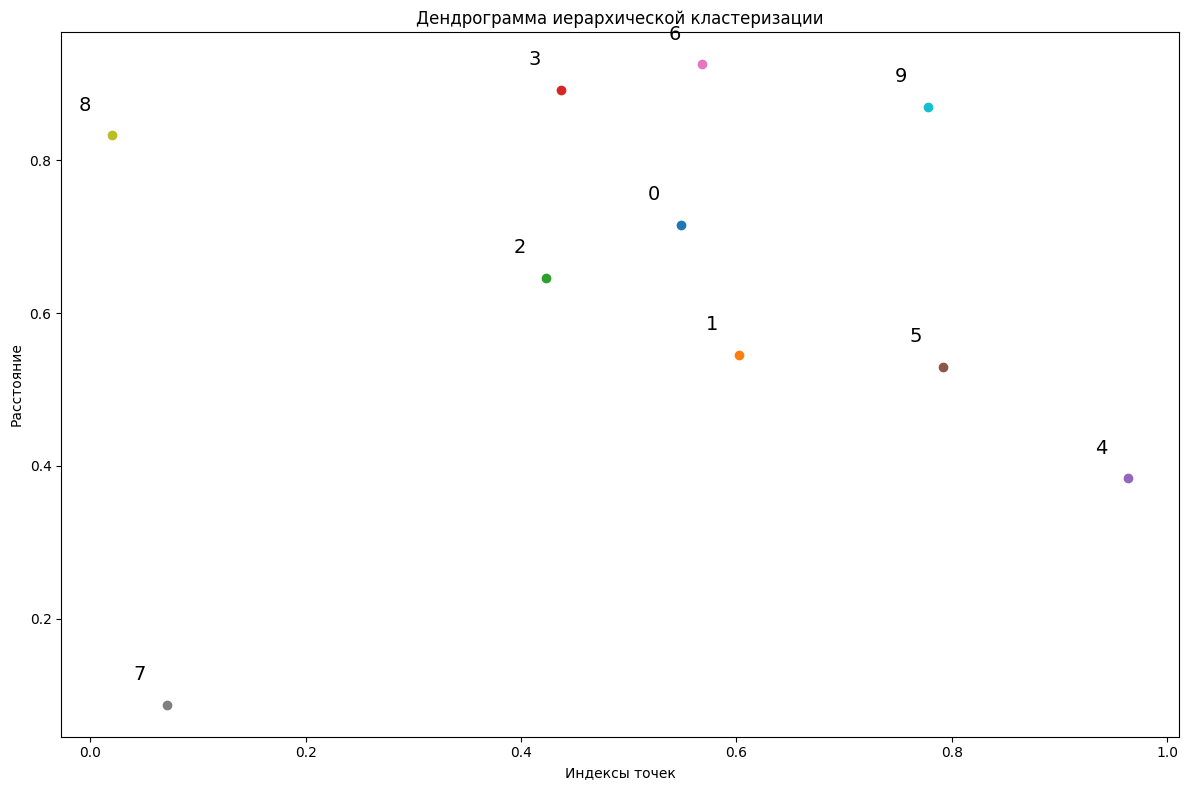

In [ ]:
plt.figure(figsize=(12, 8))  # Увеличил размер фигуры для удобства просмотра

# Отображение точек с номерами
for i in range(len(data)):
    plt.scatter(data[i][0], data[i][1])
    plt.annotate(f'{i}', xy=data[i], xytext=(-15, 15), textcoords='offset points', ha='right', va='bottom', fontsize=14)



plt.title('Дендрограмма иерархической кластеризации')
plt.xlabel('Индексы точек')
plt.ylabel('Расстояние')
plt.tight_layout()  # Улучшение компоновки графика
plt.show()

## **mean shift**

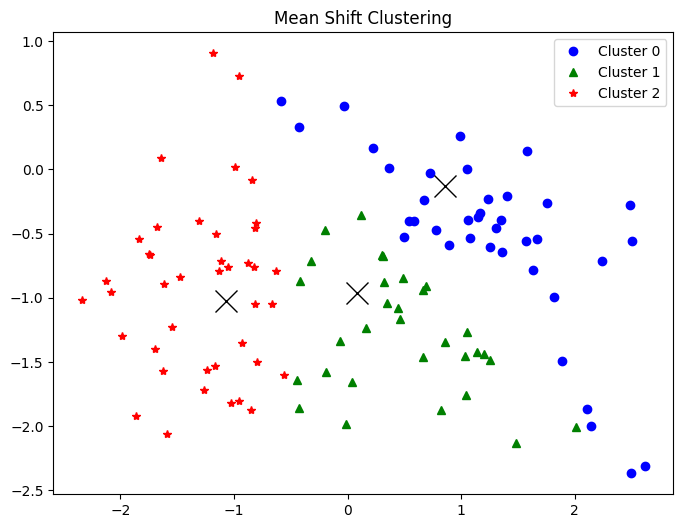

In [ ]:
import numpy as np
from sklearn.cluster import MeanShift, estimate_bandwidth
import matplotlib.pyplot as plt

# Генерация тестовых данных
np.random.seed(42)
centers = [[1, 1], [-1, -1], [1, -1]]
X = []
for center in centers:
    X.extend(np.random.normal(center, 0.7, size=(50, 2)))
X = np.array(X)

# Оценка ширины полосы пропускания (bandwidth)
bandwidth = estimate_bandwidth(X, quantile=0.2)

# Применение алгоритма Mean Shift
ms = MeanShift(bandwidth=bandwidth, bin_seeding=True)
ms.fit(X)
labels = ms.labels_
cluster_centers = ms.cluster_centers_

# Визуализация результата
plt.figure(figsize=(8, 6))
colors = ['b', 'g', 'r']
markers = ['o', '^', '*']

for k, col, marker in zip(range(len(cluster_centers)), colors, markers):
    my_members = labels == k
    cluster_center = cluster_centers[k]

    plt.plot(X[my_members, 0], X[my_members, 1], col + marker, label=f'Cluster {k}')
    plt.plot(cluster_center[0], cluster_center[1], 'kx', markersize=16)

plt.legend()
plt.title("Mean Shift Clustering")
plt.show()

**Spectral Clustering**

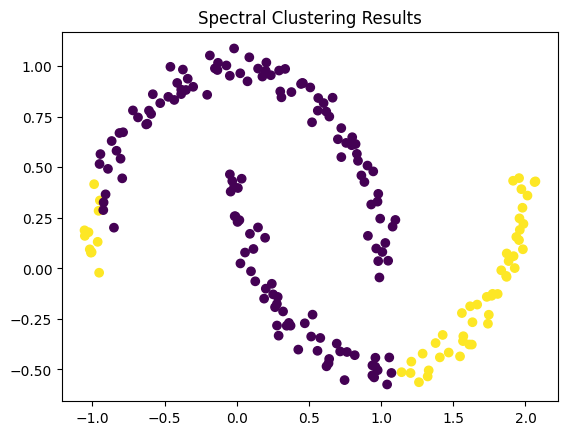

In [1]:
import numpy as np
from sklearn.cluster import KMeans
from scipy.sparse.csgraph import laplacian
from scipy.sparse.linalg import eigsh

def spectral_clustering(data, n_clusters=2):
    # Шаг 1: Построение матрицы смежности
    num_samples = data.shape[0]
    affinity_matrix = np.exp(-np.sum((data[:, None, :] - data[None, :, :])**2, axis=-1) / (2 * .5**2))

    # Шаг 2: Нормализация матрицы смежности
    normalized_laplacian = laplacian(affinity_matrix, normed=True)

    # Шаг 3: Вычисление собственных векторов
    eigenvalues, eigenvectors = eigsh(normalized_laplacian, k=n_clusters+1, which='SM')

    # Берем первые собственные векторы (кроме первого, соответствующего собственному значению 0)
    embedding = eigenvectors[:, 1:]

    # Шаг 4: Кластеризация в пространстве собственных векторов
    kmeans = KMeans(n_clusters=n_clusters).fit(embedding)
    labels = kmeans.labels_

    return labels

# Пример использования
if __name__ == "__main__":
    # Генерация тестовых данных
    from sklearn.datasets import make_moons
    X, y_true = make_moons(n_samples=200, noise=0.05)

    # Применение алгоритма Spectral Clustering
    labels = spectral_clustering(X, n_clusters=2)

    # Визуализация результатов
    import matplotlib.pyplot as plt
    plt.scatter(X[:, 0], X[:, 1], c=labels, cmap="viridis")
    plt.title("Spectral Clustering Results")
    plt.show()


**Affinity Propagation**

Количество найденных кластеров: 2


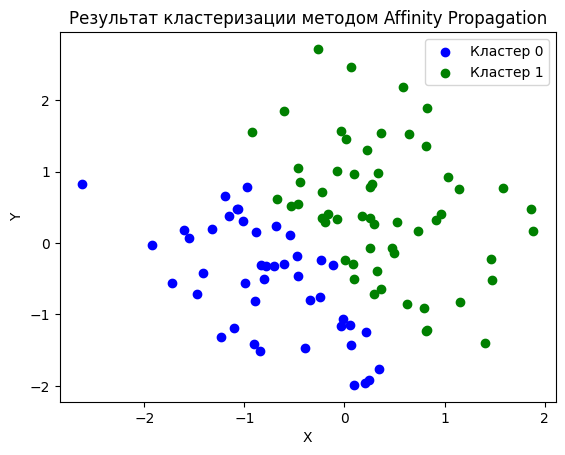

In [3]:
import numpy as np
from sklearn.cluster import AffinityPropagation
import matplotlib.pyplot as plt

def affinity_propagation_example():
    # Генерируем случайные данные
    np.random.seed(42)
    data = np.random.randn(100, 2)

    # Инициализируем и запускаем Affinity Propagation
    af = AffinityPropagation(preference=-50).fit(data)

    # Получаем метки кластеров
    cluster_labels = af.labels_

    # Количество уникальных кластеров
    n_clusters_ = len(np.unique(cluster_labels))

    print(f"Количество найденных кластеров: {n_clusters_}")

    # Функция для отображения точек с раскраской по принадлежности к кластеру
    def visualize_clusters(data, cluster_labels):
        unique_labels = set(cluster_labels)
        colors = ['b', 'g', 'r', 'c', 'm', 'y', 'k']  # Цвета для разных кластеров

        for label in unique_labels:
            indices = np.where(cluster_labels == label)[0]
            plt.scatter(data[indices, 0], data[indices, 1], color=colors[label % len(colors)], label=f"Кластер {label}")

        plt.legend()
        plt.xlabel('X')
        plt.ylabel('Y')
        plt.title('Результат кластеризации методом Affinity Propagation')
        plt.show()

    # Вызов функции визуализации
    visualize_clusters(data, cluster_labels)

if __name__ == "__main__":
    affinity_propagation_example()

**OPTICS (Ordering Points To Identify the Clustering Structure)**


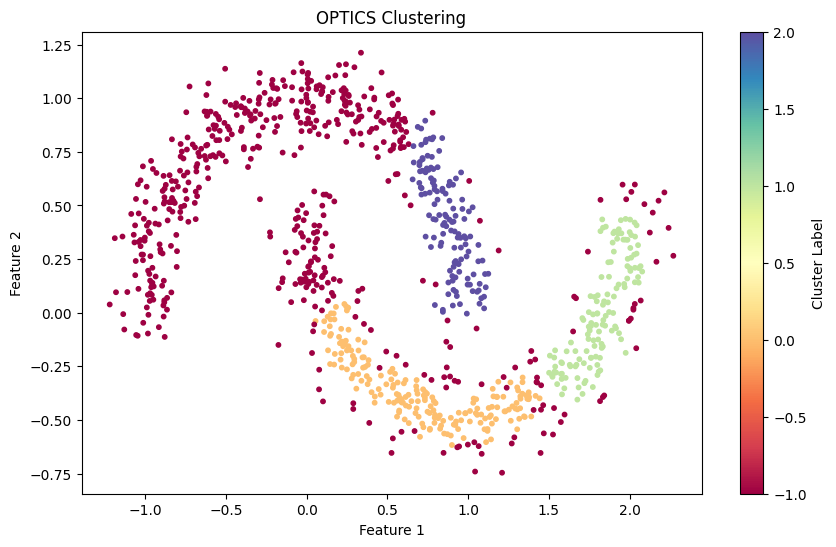

In [6]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import OPTICS

# Генерация искусственных данных
X, _ = make_moons(n_samples=1000, noise=0.1, random_state=42)

# Применение алгоритма OPTICS
optics = OPTICS(min_samples=5, xi=0.05, min_cluster_size=0.1)
labels = optics.fit_predict(X)

# Визуализация результатов
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='Spectral', s=10)
plt.title('OPTICS Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster Label')
plt.show()


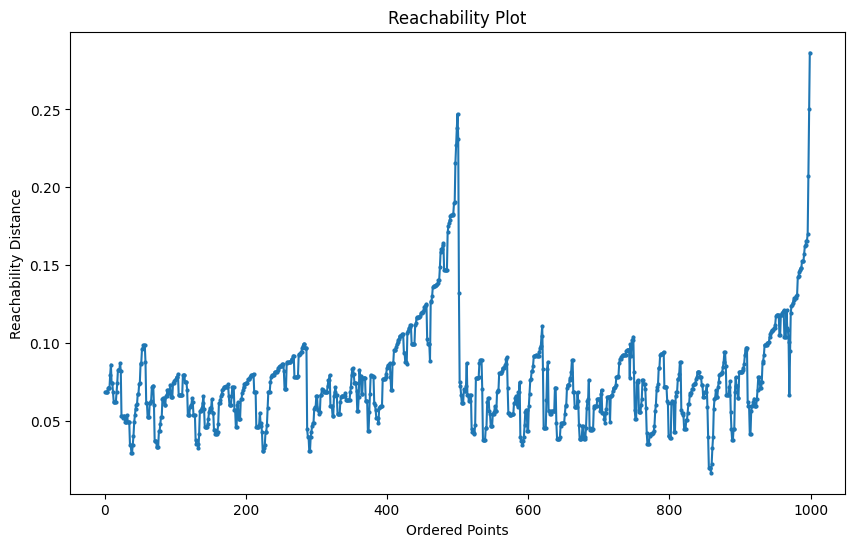

In [7]:
from sklearn.preprocessing import StandardScaler

# Стандартизация данных
X_scaled = StandardScaler().fit_transform(X)

# Применение алгоритма OPTICS
optics = OPTICS(min_samples=5, xi=0.05, min_cluster_size=0.1)
optics.fit(X_scaled)

# Визуализация Reachability Plot
plt.figure(figsize=(10, 6))
plt.plot(optics.reachability_[optics.ordering_], marker='o', linestyle='-', markersize=2)
plt.title('Reachability Plot')
plt.xlabel('Ordered Points')
plt.ylabel('Reachability Distance')
plt.show()


**fuzzy c-means**

In [11]:
!pip install fuzzy-c-means

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 46.0/46.0 kB 4.0 MB/s eta 0:00:00
  Attempting uninstall: typer
    Found existing installation: typer 0.15.1
    Uninstalling typer-0.15.1:
      Successfully uninstalled typer-0.15.1
  Attempting uninstall: tabulate
    Found existing installation: tabulate 0.9.0
    Uninstalling tabulate-0.9.0:
      Successfully uninstalled tabulate-0.9.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
bigframes 1.37.0 requires tabulate>=0.9, but you have tabulate 0.8.10 which is incompatible.


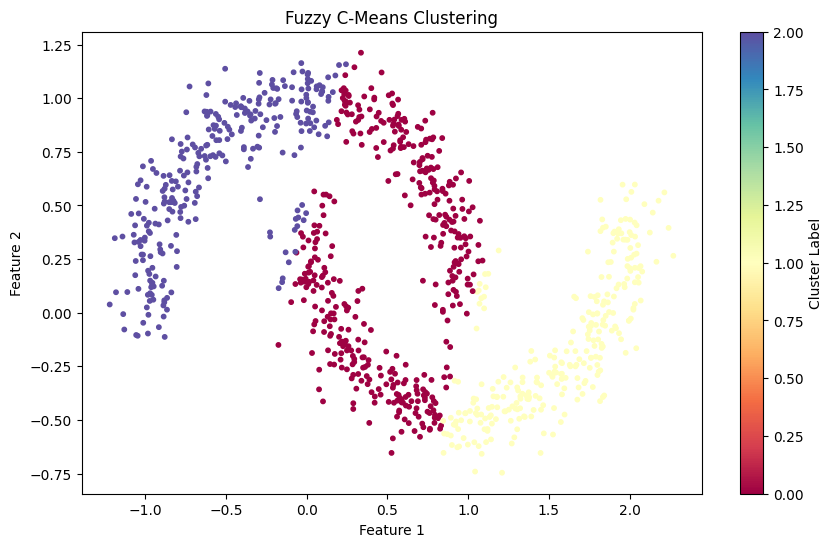

In [12]:
from fcmeans import FCM

# Генерация данных
X, _ = make_moons(n_samples=1000, noise=0.1, random_state=42)

# Применение алгоритма Fuzzy C-Means
fcm = FCM(n_clusters=3)
fcm.fit(X)
labels_fcm = fcm.predict(X)

# Визуализация результатов
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels_fcm, cmap='Spectral', s=10)
plt.title('Fuzzy C-Means Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster Label')
plt.show()


**BIRCH**

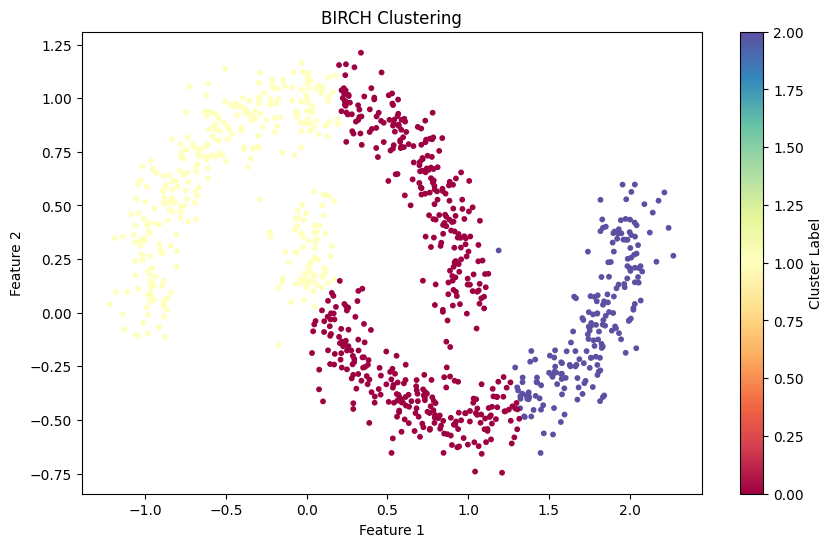

In [13]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_moons
from sklearn.cluster import Birch

# Генерация данных
X, _ = make_moons(n_samples=1000, noise=0.1, random_state=42)

# Применение алгоритма BIRCH
birch = Birch(n_clusters=3)
labels_birch = birch.fit_predict(X)

# Визуализация результатов
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels_birch, cmap='Spectral', s=10)
plt.title('BIRCH Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster Label')
plt.show()


**Gaussian Mixture Models (GMM)**

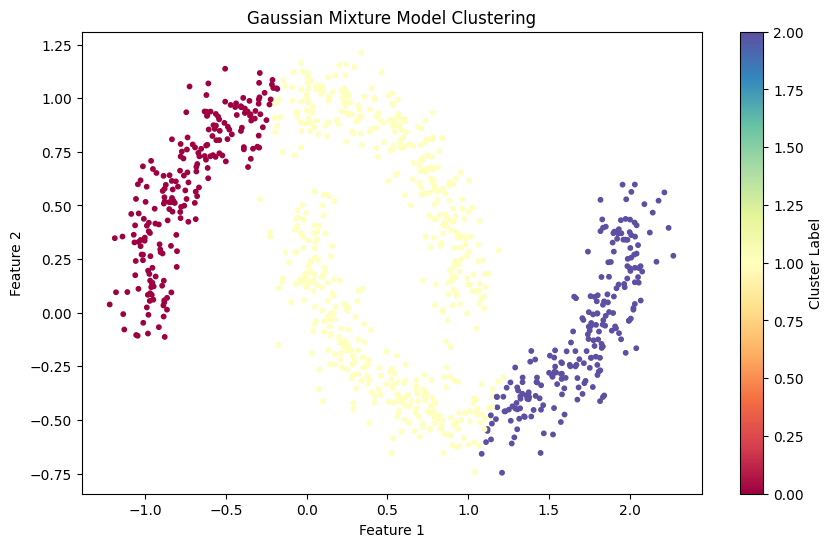

In [18]:
from sklearn.mixture import GaussianMixture

# Генерация данных
X, _ = make_moons(n_samples=1000, noise=0.1, random_state=42)

# Применение GMM
gmm = GaussianMixture(n_components=3)
gmm.fit(X)
labels_gmm = gmm.predict(X)

# Визуализация результатов
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels_gmm, cmap='Spectral', s=10)
plt.title('Gaussian Mixture Model Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster Label')
plt.show()


**Agglomerative Clustering**

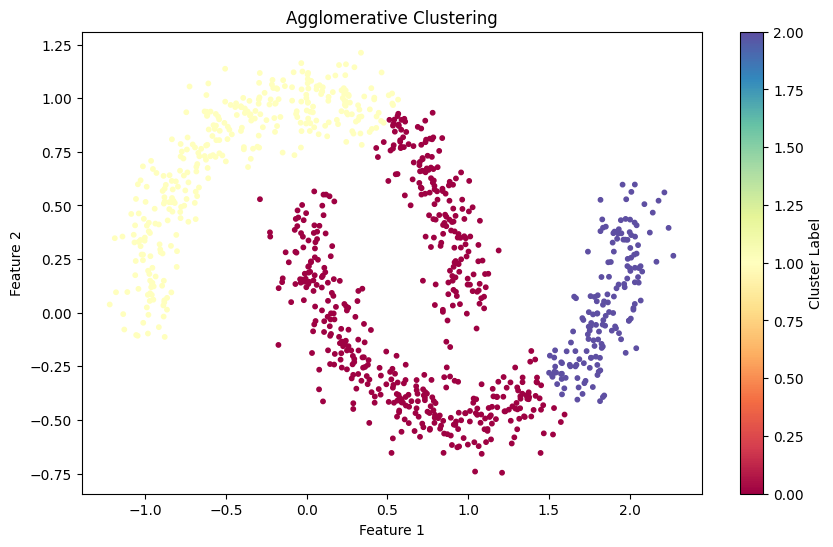

In [20]:
from sklearn.cluster import AgglomerativeClustering

# Генерация данных
X, _ = make_moons(n_samples=1000, noise=0.1, random_state=42)

# Применение Agglomerative Clustering
agglo = AgglomerativeClustering(n_clusters=3)
labels_agglo = agglo.fit_predict(X)

# Визуализация результатов
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels_agglo, cmap='Spectral', s=10)
plt.title('Agglomerative Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster Label')
plt.show()


**Affinity Propagation**

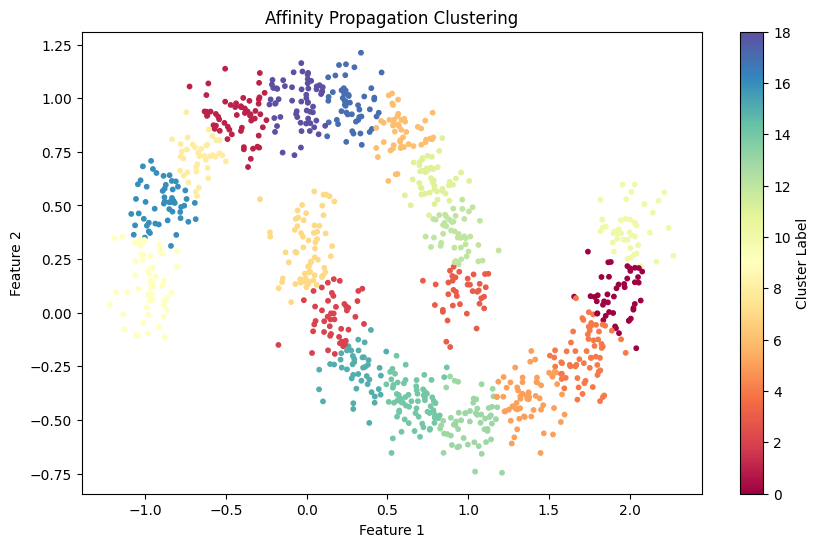

In [21]:
from sklearn.cluster import AffinityPropagation

# Генерация данных
X, _ = make_moons(n_samples=1000, noise=0.1, random_state=42)

# Применение Affinity Propagation
affinity_propagation = AffinityPropagation()
labels_affinity = affinity_propagation.fit_predict(X)

# Визуализация результатов
plt.figure(figsize=(10, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels_affinity, cmap='Spectral', s=10)
plt.title('Affinity Propagation Clustering')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.colorbar(label='Cluster Label')
plt.show()
